In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import datetime as dt

In [5]:
import seaborn as sns

In [6]:
cust_acq = pd.read_csv("C:/Users/Rohit/Downloads/Python/Case Study/2 Python Credit Card Case Study/Customer Acqusition.csv")
cust_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [7]:
cust_acq.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [8]:
cust_acq.drop(columns='No', inplace = True)
cust_acq.dropna(axis=1, how='all', inplace=True)
cust_acq.dropna(axis=0, how='all', inplace=True)
cust_acq.head(3)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [9]:
cust_acq.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [10]:
spend = pd.read_csv("C:/Users/Rohit/Downloads/Python/Case Study/2 Python Credit Card Case Study/spend.csv")
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [11]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [12]:
spend.drop(columns='Sl No:', inplace = True)
spend.dropna(axis=1, how='all', inplace=True)
spend.dropna(axis=0, how='all', inplace=True)
spend.rename(columns={'Amount' : 'spend_Amount'}, inplace= True)
spend.rename(columns={'Month' : 'spend_Date'}, inplace= True)
spend['spend_Date']=pd.to_datetime(spend['spend_Date'], format='%d-%b-%y')
spend.head(3)

,Customer,spend_Date,Type,spend_Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46


In [13]:
spend.isnull().sum()

Customer        0
spend_Date      0
Type            0
spend_Amount    0
dtype: int64

In [14]:
repayment=pd.read_csv("C:/Users/Rohit/Downloads/Python/Case Study/2 Python Credit Card Case Study/Repayment.csv")
repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [15]:
repayment.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [16]:
repayment.drop(columns='SL No:', inplace = True)
repayment.dropna(axis=1, how='all', inplace=True)
repayment.dropna(axis=0, how='all', inplace=True)
repayment.rename(columns={'Amount' : 'repay_Amount'}, inplace= True)
repayment.rename(columns={'Month' : 'repay_Date'}, inplace= True)
repayment['repay_Date']=pd.to_datetime(repayment['repay_Date'], format='%d-%b-%y')
repayment.head(3)

,Customer,repay_Date,repay_Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06


In [17]:
repayment.isnull().sum()

Customer        0
repay_Date      0
repay_Amount    0
dtype: int64

##### Q1.a  In case age is less than 18, replace it with mean of age values.

In [18]:
cust_acq.loc[cust_acq['Age']<=18, 'Age']=cust_acq.Age.mean()

##### Q1.b  In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [19]:
cust_acq_spend=pd.merge(left=cust_acq, right=spend, how='inner', on='Customer')
cust_acq_spend

,Customer,Age,City,Product,Limit,Company,Segment,spend_Date,Type,spend_Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [20]:
cust_acq_spend.loc[cust_acq_spend['spend_Amount']>=cust_acq_spend['Limit'], 'spend_Amount']=(50 * cust_acq_spend['Limit']).div(100)

##### Q1.C Incase the repayment amount is more than the limit, replace the repayment with the limit

In [21]:
cust_acq_repayment=pd.merge(left= cust_acq, right= repayment, how='inner', on='Customer')
cust_acq_repayment

,Customer,Age,City,Product,Limit,Company,Segment,repay_Date,repay_Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73


In [22]:
cust_acq_repayment.loc[cust_acq_repayment['repay_Amount']>cust_acq_repayment['Limit'], 'repay_Amount']=cust_acq_repayment['Limit']

#### Q2  From the above dataset create the following summaries:
##### a. How many distinct customers exist?

In [23]:
distinct_cust=cust_acq['Customer'].nunique()
print('Number of distinct customers are',distinct_cust)

Number of distinct customers are 100


##### b. How many distinct categories exist?

In [24]:
categories_unique=cust_acq['Segment'].nunique()

In [25]:
cust_acq['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [26]:
print('Number of distinct categories are',categories_unique)

Number of distinct categories are 5


##### c. What is the average monthly spend by customers?

In [27]:
spend['spend_Month']=spend['spend_Date'].apply(lambda x : dt.datetime.strftime(x, '%B'))
spend['spend_Year']=spend['spend_Date'].apply(lambda x : dt.datetime.strftime(x, '%Y'))

In [28]:
Avg_monthly_spend=spend.groupby(['spend_Year', 'spend_Month'])[['spend_Amount']].mean().round(2).reset_index()
Avg_monthly_spend

,spend_Year,spend_Month,spend_Amount
0,2004,April,235272.04
1,2004,February,221215.27
2,2004,January,251712.07
3,2004,March,232146.12
4,2004,May,217539.24
5,2004,November,270486.40
6,2004,September,310923.38
7,2005,April,252181.33
8,2005,August,233734.63
9,2005,December,147503.06


##### d. What is the average monthly repayment by customers?

In [29]:
repayment['repay_Month']=repayment['repay_Date'].apply(lambda x : dt.datetime.strftime(x, '%B'))
repayment['repay_Year']=repayment['repay_Date'].apply(lambda x : dt.datetime.strftime(x, '%Y'))

In [30]:
Avg_monthly_repayment=repayment.groupby(['repay_Year', 'repay_Month'])[['repay_Amount']].mean().round(2).reset_index()
Avg_monthly_repayment

,repay_Year,repay_Month,repay_Amount
0,2004,April,259141.68
1,2004,February,256702.63
2,2004,January,243489.65
3,2004,March,252585.28
4,2004,May,226162.72
5,2004,November,209592.24
6,2004,September,184487.85
7,2005,April,212688.63
8,2005,August,264430.92
9,2005,December,320379.34


##### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [31]:
cust_spend_repay=pd.merge(left= Avg_monthly_spend, right= Avg_monthly_repayment, how= 'inner', left_on=['spend_Year','spend_Month'], right_on=['repay_Year','repay_Month'])
cust_spend_repay

,spend_Year,spend_Month,spend_Amount,repay_Year,repay_Month,repay_Amount
0,2004,April,235272.04,2004,April,259141.68
1,2004,February,221215.27,2004,February,256702.63
2,2004,January,251712.07,2004,January,243489.65
3,2004,March,232146.12,2004,March,252585.28
4,2004,May,217539.24,2004,May,226162.72
5,2004,November,270486.40,2004,November,209592.24
6,2004,September,310923.38,2004,September,184487.85
7,2005,April,252181.33,2005,April,212688.63
8,2005,August,233734.63,2005,August,264430.92
9,2005,December,147503.06,2005,December,320379.34


In [32]:
cust_spend_repay['Monthly_profit']=cust_spend_repay['repay_Amount']-cust_spend_repay['spend_Amount']
cust_spend_repay['profit']=np.where(cust_spend_repay['Monthly_profit']>0, round(cust_spend_repay['Monthly_profit']*2.9/100, 2), np.nan )
cust_spend_repay

,spend_Year,spend_Month,spend_Amount,repay_Year,repay_Month,repay_Amount,Monthly_profit,profit
0,2004,April,235272.04,2004,April,259141.68,23869.64,692.22
1,2004,February,221215.27,2004,February,256702.63,35487.36,1029.13
2,2004,January,251712.07,2004,January,243489.65,-8222.42,NaN
3,2004,March,232146.12,2004,March,252585.28,20439.16,592.74
4,2004,May,217539.24,2004,May,226162.72,8623.48,250.08
5,2004,November,270486.40,2004,November,209592.24,-60894.16,NaN
6,2004,September,310923.38,2004,September,184487.85,-126435.53,NaN
7,2005,April,252181.33,2005,April,212688.63,-39492.70,NaN
8,2005,August,233734.63,2005,August,264430.92,30696.29,890.19
9,2005,December,147503.06,2005,December,320379.34,172876.28,5013.41


#####  f. What are the top 5 product types?

In [33]:
cust_acq_spend['Type'].value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

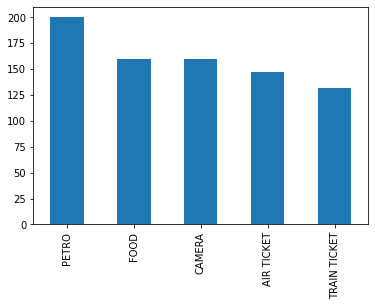

In [34]:
cust_acq_spend['Type'].value_counts().head(5).plot(kind='bar')
plt.show()

##### g. Which city is having maximum spend?

In [35]:
max_spend_cities=cust_acq_spend.groupby('City')[['spend_Amount']].sum().sort_values('spend_Amount', ascending=False).reset_index()
max_spend_cities

,City,spend_Amount
0,COCHIN,45963513.50
1,CALCUTTA,41108132.30
2,BANGALORE,40461647.02
3,BOMBAY,28603127.38
4,CHENNAI,22128635.65
5,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
7,DELHI,10918286.54


In [36]:
print('Cochin city is having maximum spend')

Cochin city is having maximum spend


In [37]:
cust_acq_spend['Age'].min()

19.0

In [38]:
cust_acq_spend['Age'].max()

79.0

##### h. Which age group is spending more money?

In [62]:
cust_acq_spend['Age_group']=pd.cut(cust_acq_spend['Age'], bins=np.arange(17, 88, 10), labels=('18-27', '28-37', '38-47', '48-57', '58-67', '68-77', '78-87'))
cust_acq_spend 

,Customer,Age,City,Product,Limit,Company,Segment,spend_Date,Type,spend_Amount,Age_group,spend_Month,spend_Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,68-77,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,68-77,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,68-77,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,68-77,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,68-77,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,48-57,January,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,58-67,January,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,48-57,January,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,28-37,January,2004


In [63]:
max_spending_agegrp=cust_acq_spend.groupby('Age_group')['spend_Amount'].sum().sort_values(ascending=False)
max_spending_agegrp

Age_group
38-47    59227155.73
28-37    51158326.51
48-57    32038137.38
18-27    27093020.72
58-67    20628443.21
68-77    16401972.45
78-87    13234029.23
Name: spend_Amount, dtype: float64

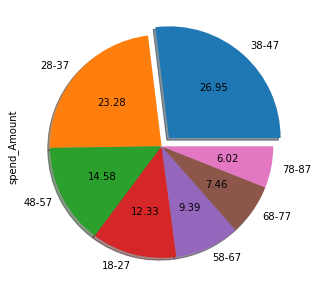

In [64]:
plt.figure(figsize=(5,10))
max_spending_agegrp.plot(kind = "pie",autopct="%.2f",explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0],shadow=True)
plt.show()

In [72]:
print('Age group of 38-47 is spending more money compared to others')

Age group of 38-47 is spending more money compared to others


##### i. Who are the top 10 customers in terms of repayment?

In [65]:
max_spending_cust=cust_acq_repayment.groupby('Customer')['repay_Amount'].sum().sort_values(ascending=False)
max_spending_cust.head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: repay_Amount, dtype: float64

#### Q3 Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [68]:
cust_acq_spend['spend_Month']=cust_acq_spend['spend_Date'].apply(lambda x : dt.datetime.strftime(x, '%B'))
cust_acq_spend['spend_Year']=cust_acq_spend['spend_Date'].apply(lambda x : dt.datetime.strftime(x, '%Y'))

In [69]:
cust_acq_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,spend_Date,Type,spend_Amount,Age_group,spend_Month,spend_Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,68-77,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,68-77,January,2004


In [70]:
city_wise_spend=cust_acq_spend.pivot_table(index=['City','spend_Year'],columns='Product',values='spend_Amount', aggfunc='sum')
city_wise_spend

Product                       Gold    Platimum      Silver
City       spend_Year                                     
BANGALORE  2004         9289878.54  1112732.30  1291852.58
           2005        12892362.99   912284.97   830612.34
           2006        12030611.09   685831.27  1415480.94
BOMBAY     2004         6987853.53   897264.94   532089.03
           2005         8983018.28   711804.94   508988.54
           2006         7917144.31   972130.01  1092833.80
CALCUTTA   2004         7477140.98  2037690.30   500006.00
           2005        10303355.80  4434696.31   440147.06
           2006        11167532.77  3589606.66  1157956.42
CHENNAI    2004         1059618.50  3535652.38   282056.86
           2005         3740945.58  5053956.32   377184.49
           2006         2704288.62  5024923.40   350009.50
COCHIN     2004         7315850.15  3419904.07   814229.62
           2005        12110613.03  4960921.71   652269.38
           2006        10499142.38  4920592.29  1269990.87
DELHI      2004         2806495.00   283512.89   768172.30
           2005         1964845.27   494157.86   612311.21
           2006         2957103.32   176788.72   854899.97
PATNA      2004         2072567.90  1113069.60   756684.10
           2005         3252615.77  2883231.07   950094.19
           2006         2276181.69  1256137.65   700005.00
TRIVANDRUM 2004         2415102.84  2161676.67   209667.48
           2005         1240375.85  3601443.30   269912.99
           2006         2735710.87  2147403.75   555862.12

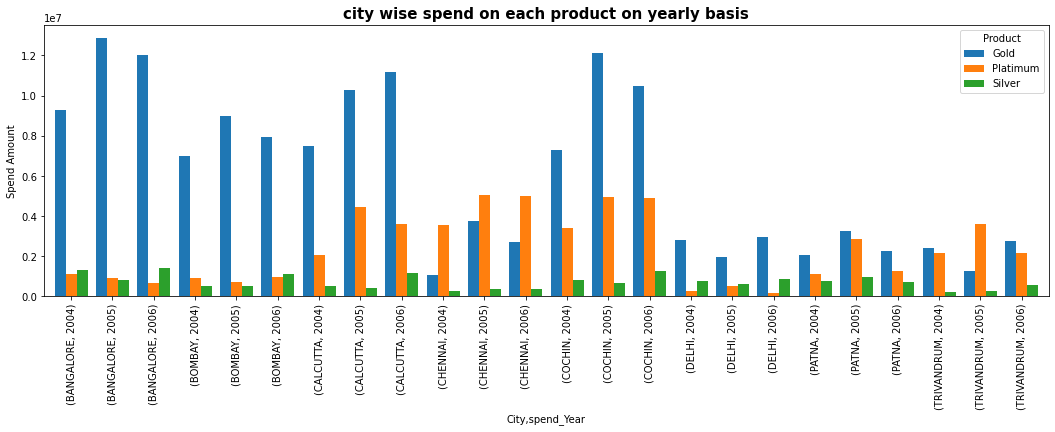

In [71]:
city_wise_spend.plot(kind='bar',figsize=(18,5),width=0.8)
plt.ylabel('Spend Amount')
plt.title('city wise spend on each product on yearly basis', fontsize='15', fontweight='bold')
plt.show()

#### 4. Create graphs for
##### a. Monthly comparison of total spends, city wise

In [48]:
monthly_citywise_spend=cust_acq_spend.pivot_table(index='spend_Month', columns='City', values='spend_Amount', aggfunc='sum')
monthly_citywise_spend

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
spend_Month,,,,,,,,
April,4207980.48,1873785.01,3457507.95,2518656.99,3882744.94,777240.75,2338179.53,1199293.45
August,695061.95,1066744.75,1548354.02,305875.97,2317306.61,155402.16,419383.64,453773.94
December,422167.24,140040.71,55001.50,223628.27,909533.05,842342.02,50000.00,640922.26
February,6734494.76,4276988.30,8150545.61,4385815.95,5747886.38,1494064.06,2353333.55,2857123.89
January,9041796.84,5948993.33,9064864.90,4466961.36,11714373.54,2714261.45,4916205.55,3704336.99
July,2228217.69,177726.32,2234573.27,693825.77,1290897.30,50001.50,50000.00,260484.50
June,1330685.90,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
March,5362903.07,5227850.50,4939040.04,3183643.71,5645146.53,2267149.02,1437166.61,2392316.51
May,6383115.13,3891945.60,5578246.87,2856199.62,6581085.69,1600322.07,2136586.80,2813534.48


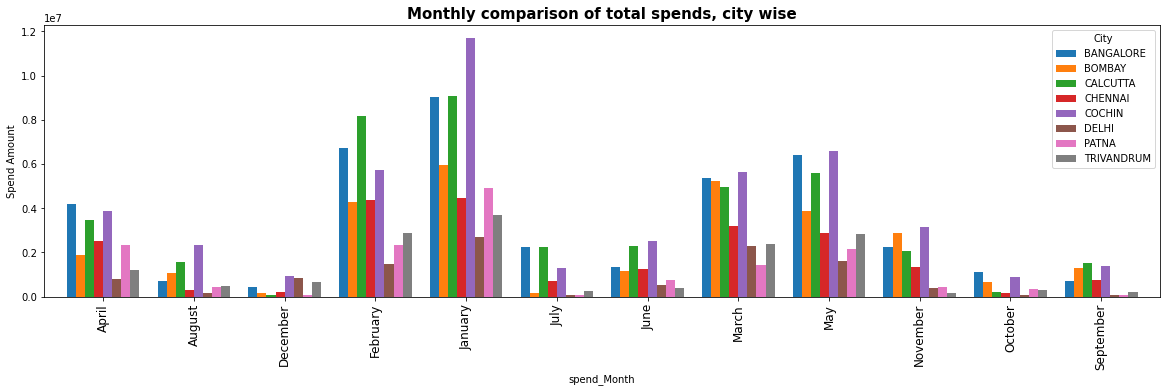

In [49]:
monthly_citywise_spend.plot(kind='bar',figsize=(20,5),width=0.8)
plt.ylabel('Spend Amount')
plt.title('Monthly comparison of total spends, city wise', fontsize='15', fontweight='bold')
plt.xticks(fontsize=12)
plt.show()

##### b. Comparison of yearly spend on air tickets

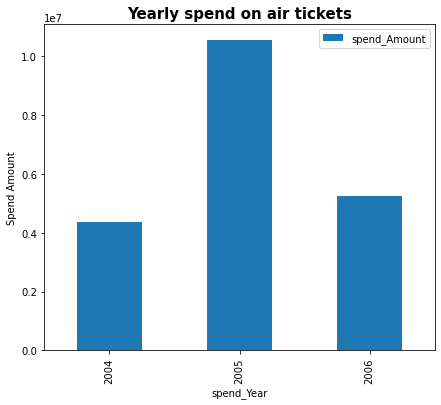

In [50]:
cust_acq_spend[cust_acq_spend['Type'] == 'AIR TICKET'].pivot_table(index='spend_Year', values='spend_Amount', aggfunc='sum').plot(kind='bar', figsize=(7, 6))
plt.ylabel('Spend Amount')
plt.title('Yearly spend on air tickets', fontsize='15', fontweight='bold')
plt.show()

##### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


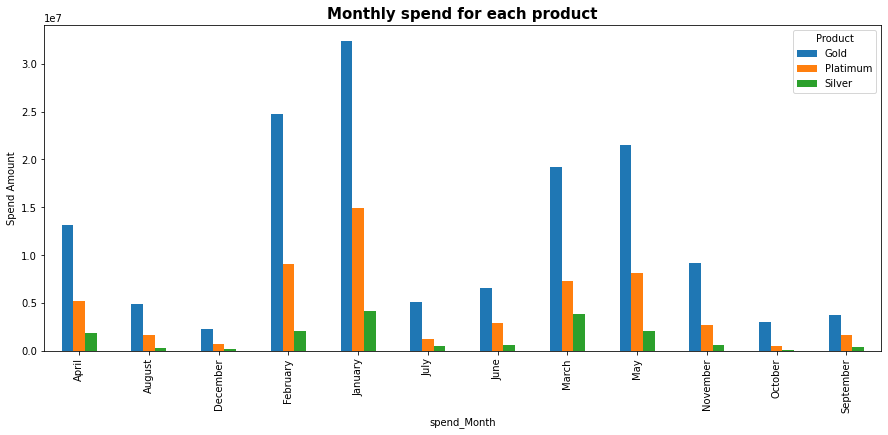

In [51]:
cust_acq_spend.pivot_table(index='spend_Month', columns='Product', values='spend_Amount', aggfunc='sum').plot(kind='bar',width=0.5, figsize=(15, 6))
plt.ylabel('Spend Amount')
plt.title('Monthly spend for each product', fontsize='15', fontweight='bold')
plt.xticks(fontsize=10)
plt.show()

#### 5. Write user defined PYTHON function to perform the following analysis:
##### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers

In [52]:
cust_acq_repayment

,Customer,Age,City,Product,Limit,Company,Segment,repay_Date,repay_Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [53]:
cust_acq_repayment['repay_Month']=cust_acq_repayment['repay_Date'].apply(lambda x : dt.datetime.strftime(x, '%B'))
cust_acq_repayment['repay_Year']=cust_acq_repayment['repay_Date'].apply(lambda x : dt.datetime.strftime(x, '%Y'))
cust_acq_repayment

,Customer,Age,City,Product,Limit,Company,Segment,repay_Date,repay_Amount,repay_Month,repay_Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,January,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,January,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,January,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,January,2004


In [54]:
def top_10_customers(product_cat, time_period):
    return cust_acq_repayment.loc[(cust_acq_repayment['Product']==product_cat) & (cust_acq_repayment['repay_Year']==time_period)].groupby(['Customer', 'Product', 'repay_Year'])['repay_Amount'].sum()

In [57]:
product_cat=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Gold
Please Enter Time Period and time period should be in yearly/monthly: 2005


In [58]:
top_10_customers(product_cat, time_period)

Customer  Product  repay_Year
A1        Gold     2005          1529158.77
A10       Gold     2005          1246843.93
A11       Gold     2005          2045470.88
A12       Gold     2005          2877588.30
A13       Gold     2005          3757673.00
A14       Gold     2005          2491981.61
A15       Gold     2005          1720768.79
A16       Gold     2005          1226247.16
A17       Gold     2005           731143.83
A26       Gold     2005          2433837.95
A27       Gold     2005          2782591.71
A28       Gold     2005          2827009.82
A29       Gold     2005          1706779.22
A30       Gold     2005          2667746.38
A31       Gold     2005          1448641.71
A32       Gold     2005           696673.46
A42       Gold     2005          3125758.43
A43       Gold     2005          4006956.60
A44       Gold     2005          4165317.77
A45       Gold     2005          4042447.57
A60       Gold     2005          3742856.10
A61       Gold     2005          4276860.55
A6